# Implementing the k-means clustering algorithm from scratch

In [6]:
import numpy as np
import matplotlib.pyplot as plt

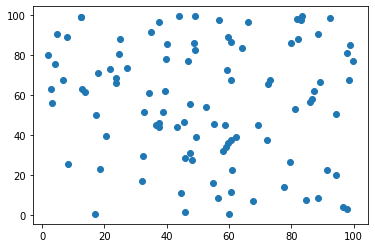

In [7]:
data = np.random.rand(100,4) * 100 # The dimensionality of the input doesn't matter.
plt.scatter(data[:,0], data[:,1])

## 1. k-means clustering

The K-means clustering algorithm will be implemented as follows:
1. Select k random points as the centroids of the new clusters.
2. Loop the following procedure:
    * Assign each point to the centroid that is the minimum Euclidean distance away from the point.
    * Calculate the centroid of the new cluster $\displaystyle \vec{C}_n = \frac{1}{N}\sum \vec{p}_n$, where $N$ is the number of points in the cluster.

In [8]:
class KMeans:
    def KPP_centroids(data, k):
        centroids = [data[np.random.choice(data.shape[0], 1, False)]]
        for i in range(k-1):
            dist = np.array([KMeans.min_centroid_dist(p, centroids)**2 for p in data])
            dist = dist/np.sum(dist)
            centroids.append(data[np.random.choice(data.shape[0], 1, p=dist)])
        return np.array(centroids)

    def min_centroid(pt, centroids):
        return np.argmin([np.linalg.norm(pt-ct) for ct in centroids])
    
    def min_centroid_dist(pt, centroids):
        return np.min([np.linalg.norm(pt-ct) for ct in centroids])

    def update_centroids(data, centroids):
        assign = [KMeans.min_centroid(p, centroids) for p in data]

        N = np.array([0 for _ in range(centroids.shape[0])])
        vec_sum = np.array([np.zeros(data.shape[1]) for _ in range(centroids.shape[0])])
        for pt in range(data.shape[0]):
            N[assign[pt]] += 1
            vec_sum[assign[pt]] += data[pt]
        centroids = np.array([vec/n for vec, n in zip(vec_sum, N)])
        return centroids, assign

    def k_means(data, k, reps=1000, min_dist=None):
        if(reps != None):
            centroids = KMeans.KPP_centroids(data, k)
            for i in range(reps):
                centroids, assign = KMeans.update_centroids(data, centroids)
        elif(min_dist != None):
            old_centroids = KMeans.KPP_centroids(data, k)
            centroids, _ = KMeans.update_centroids(data, old_centroids)
            while(np.min(np.abs(centroids-old_centroids)) > min_dist):
                old_centroids = centroids
                centroids, assign = KMeans.update_centroids(data, old_centroids)

        return centroids, assign

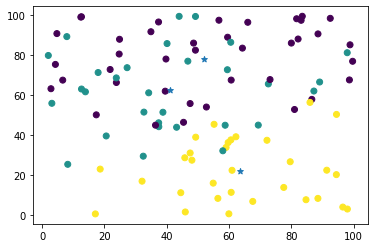

In [9]:
centroids, category = KMeans.k_means(data, 3, reps=100, min_dist=None)
plt.scatter(data[:,0], data[:,1], c=category)
plt.scatter(centroids[:,0], centroids[:,1], marker="*")

## 2. DBSCAN clustering

The algorithm will be implemented as follows:
0. Given hyperparameters $\epsilon$ (minimum distance) and $N$ (minimum neighbors)...
1. Select a random point in the dataset.
2. Find all points in the dataset which are within $\epsilon$ distance from the original point.
3. If the number of points is greater than $N$...
    - Give the point a new unique label
    - For each of the neighboring points that do NOT already have a label...
        - Run the DBSCAN algorithm on that point.
4. Else, mark the point as noise and choose another random point.

In [155]:
class DBSCAN:                
    def distance(p1, p2):
        return np.linalg.norm(p2-p1)
        
    def DBSCAN_rec(data, labels, pt, epsilon, N):
        if(labels[pt] != 0):
            return labels
    
        labels[pt] = np.max(labels) + 1
        print(labels)
        close = [DBSCAN.distance(data[pt], x) <= epsilon for x in data]
        if(sum(close) > N+1):
            for i in range(len(data)):
                if(close[i] and i != pt):
                    labels[i] = labels[pt]
                    print(i)
                    labels = DBSCAN.DBSCAN_rec(data, labels, i, epsilon, N)

        else:
            labels[pt] = -1
        
        return labels
        
                    
    def DBSCAN(data, epsilon, N):
        labels = [0 for _ in range(data.shape[0])]
        for pt in range(len(data)):
            labels = DBSCAN.DBSCAN_rec(data, labels, pt, epsilon, N)
        
        return labels

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
19
20
21
23
24
25
26
27
28
29
30
31
33
34
35
36
37
38
39
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
76
77
78
79
81
82
83
84
85
86
87
88
89
90
91
93
94
95
96
97
98
99
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]
1
4
6
8
9
11
14
15
22
24
26
28
34
38
39
40
41
42
48
50
51
52
56
59
60
61
63
64
67
68
69
70
75
76
79
80
82
83
84
86
88
90
91
92
94
9

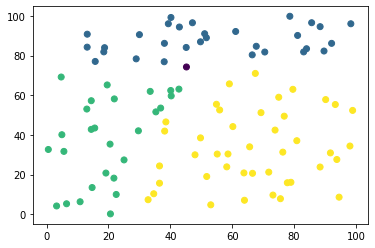

In [156]:
labels = DBSCAN.DBSCAN(data, 70, 1)
labels[labels == -1] = 0
print(labels)

plt.scatter(data[:,0], data[:,1], c=labels)